In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect("../data/checking-logs.sqlite.sqlite")

In [3]:
checker = pd.io.sql.read_sql("SELECT timestamp From checker WHERE uid LIKE 'user_%'",
                               connection, parse_dates="timestamp")
checker

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


- analyze only the users and not the admins
- the fontsize and the figsize are still the same
- night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
- choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [4]:
checker["date"] = checker["timestamp"].dt.date
checker["hour"] = checker["timestamp"].dt.hour
intervals = [0, 4, 10, 17, 24]
labels = ["night", "morning", "afternoon", "evening"]
checker["daytime"] = pd.cut(checker["hour"], intervals, labels=labels, 
                            right=False, include_lowest=True)
checker

,timestamp,date,hour,daytime
0,2020-04-17 05:19:02.744528,2020-04-17,5,morning
1,2020-04-17 05:22:35.249331,2020-04-17,5,morning
2,2020-04-17 05:22:45.549397,2020-04-17,5,morning
3,2020-04-17 05:34:14.691200,2020-04-17,5,morning
4,2020-04-17 05:34:24.422370,2020-04-17,5,morning
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,evening
3203,2020-05-21 20:22:41.785725,2020-05-21,20,evening
3204,2020-05-21 20:22:41.877806,2020-05-21,20,evening
3205,2020-05-21 20:37:00.129678,2020-05-21,20,evening


In [5]:
df = checker.groupby(["date", "daytime"]).count()
df

timestamp  hour
date       daytime                   
2020-04-17 night              0     0
           morning           13    13
           afternoon         10    10
           evening            0     0
2020-04-18 night              0     0
...                         ...   ...
2020-05-20 evening           10    10
2020-05-21 night              0     0
           morning            1     1
           afternoon         27    27
           evening           21    21

[140 rows x 2 columns]

In [6]:
pivot = pd.pivot_table(df, values="timestamp", index="date", columns="daytime", aggfunc="sum")
pivot

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


- analyze only the users and not the admins
- analyze only the dates when there were both views and checker commits
- use size of the font should be 8
- the size of the figure is (15,8)
- at the end of your Jupyter Notebook create a markdown cell and insert the question: “How many times was the number of views larger than 150?”

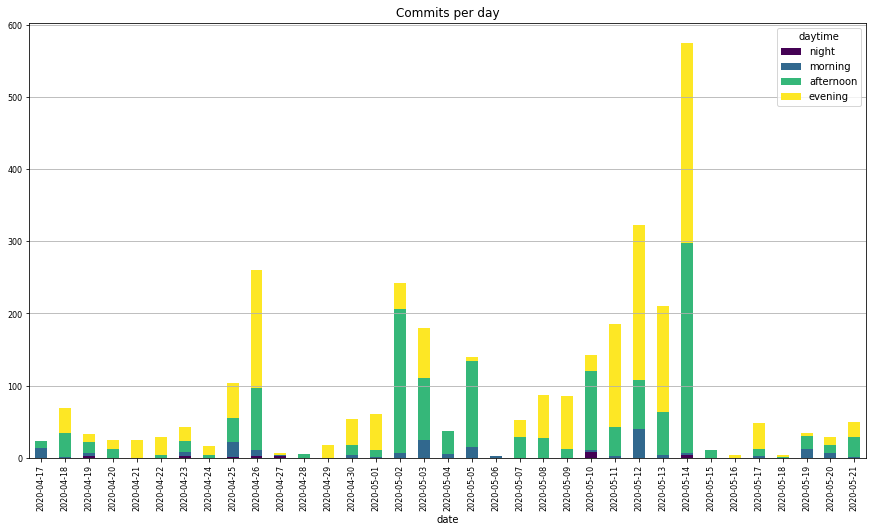

In [7]:
plot = pivot.plot(kind="bar", title="Commits per day", fontsize=8, figsize=(15,8), rot=90, 
           xlabel="date", stacked=True, colormap="viridis")
plot.yaxis.grid()

at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
- “When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods.
- Which day has:
        ∗ the most number of commits
        ∗ and at the same time, the number of commits in the evening is higher than in the afternoon?

In [8]:
pivot.sum()

daytime
night          21
morning       184
afternoon    1391
evening      1611
dtype: int64

Our users usually commit in evening and at afternoon.

The answer is 2

In [9]:
pivot.query("evening > afternoon").sum(axis=1).idxmax()

datetime.date(2020, 5, 12)

Answer: 2020-05-12

In [10]:
connection.close()